In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations lesson 6.1.4
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-31.48908186177038 163.31484569916012
36.53217262559042 -105.09680542009932
57.56757344038812 -50.5074182023194
28.00596353525792 -91.13861625644253
23.99477275670948 -36.35627620993222
13.889560950146375 21.16987480366214
19.99929572522319 143.5375955900917
16.118967824671316 -124.54252212190642
48.17359288376028 -49.290035907623576
29.484045277330182 52.80142414975401
-71.06641281394062 30.406711039893025
-64.34607838461784 56.15239236193378
-82.45759817258738 25.039103114357744
-84.20250905968798 113.06267399962167
-78.89607636542057 -119.38445782392759
59.42504026377276 67.54992519123616
13.798526887468299 73.34586202943655
-88.03884457654624 4.665335337895783
87.83507036501592 -60.08934202077579
86.90870031433923 -0.4571691632512511
-10.905187915186687 -131.5075281530874
15.372646860425704 59.67721044278866
88.8729834509675 62.5957019904875
12.783839706254597 141.77028333918162
-12.126817619627104 0.13819754683655106
-17.92862185726557 -155.84185883174365
53.86918261915176 150.589

72.19142770504547 -133.58832438130807
-4.3692428944611095 53.49027206562792
-89.3371064481019 -65.87380334872907
-1.4519764529129588 -59.12589561411008
-74.9680521442155 5.1273867781292495
16.376118997819106 -166.07360243848055
-28.12209010257326 118.57746099299902
-17.102815195377985 -84.49703611469535
88.31239377669681 -163.05803769499374
-78.01624069296538 112.5408777659419
87.96169281567012 52.771128452246074
-51.67171662460006 -46.95900269770556
51.23684192900737 144.28864878459063
-68.5849304595447 -0.9284735392189134
-27.435665362876854 65.82667746093199
77.93552833113023 168.32737017060361
-52.70759794441795 -117.60539248058882
6.328036899510394 -137.73917697707117
70.71931461356598 -135.18598540185678
22.035091640264454 -166.43949617485757


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)
    

589

In [7]:
# Starting URL for Weather Map API Call (Base URL)
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [21]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1


# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse our the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experiences, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | noumea
Processing Record 2 of Set 1 | taos
Processing Record 3 of Set 1 | paamiut
Processing Record 4 of Set 1 | houma
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | abeche
Processing Record 7 of Set 1 | shimoda
Processing Record 8 of Set 1 | constitucion
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | shiraz
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | kondinskoye
Processing Record 17 of Set 1 | honavar
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | narsaq
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set

Processing Record 37 of Set 4 | mizpe ramon
City not found. Skipping...
Processing Record 38 of Set 4 | tadian
Processing Record 39 of Set 4 | krasnoselkup
Processing Record 40 of Set 4 | cap malheureux
Processing Record 41 of Set 4 | berlevag
Processing Record 42 of Set 4 | teguldet
Processing Record 43 of Set 4 | lasa
Processing Record 44 of Set 4 | dunmore town
Processing Record 45 of Set 4 | at-bashi
Processing Record 46 of Set 4 | vysokyy
Processing Record 47 of Set 4 | la paz
Processing Record 48 of Set 4 | marion
Processing Record 49 of Set 4 | tokur
Processing Record 50 of Set 4 | vardo
Processing Record 1 of Set 5 | bengkulu
Processing Record 2 of Set 5 | necochea
Processing Record 3 of Set 5 | adrar
Processing Record 4 of Set 5 | le mans
Processing Record 5 of Set 5 | leningradskiy
Processing Record 6 of Set 5 | predivinsk
Processing Record 7 of Set 5 | hervey bay
Processing Record 8 of Set 5 | bambous virieux
Processing Record 9 of Set 5 | tessalit
Processing Record 10 of Se

Processing Record 26 of Set 8 | saint-louis
Processing Record 27 of Set 8 | zyryanka
Processing Record 28 of Set 8 | cockburn town
Processing Record 29 of Set 8 | touros
Processing Record 30 of Set 8 | poplar bluff
Processing Record 31 of Set 8 | hailey
Processing Record 32 of Set 8 | axim
Processing Record 33 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 34 of Set 8 | nanakuli
Processing Record 35 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 36 of Set 8 | raudeberg
Processing Record 37 of Set 8 | amapa
Processing Record 38 of Set 8 | narok
Processing Record 39 of Set 8 | arlit
Processing Record 40 of Set 8 | atherton
Processing Record 41 of Set 8 | souillac
Processing Record 42 of Set 8 | kawana waters
City not found. Skipping...
Processing Record 43 of Set 8 | octeville
Processing Record 44 of Set 8 | sao miguel do araguaia
Processing Record 45 of Set 8 | ingham
Processing Record 46 of Set 8 | abapo
Processing Record 47 of Set 8 | ashla

Processing Record 10 of Set 12 | hasaki
Processing Record 11 of Set 12 | naco
Processing Record 12 of Set 12 | tual
Processing Record 13 of Set 12 | waingapu
Processing Record 14 of Set 12 | nikel
Processing Record 15 of Set 12 | pishva
Processing Record 16 of Set 12 | caala
Processing Record 17 of Set 12 | qurayyat
Processing Record 18 of Set 12 | heze
Processing Record 19 of Set 12 | bocaranga
City not found. Skipping...
Processing Record 20 of Set 12 | havre-saint-pierre
Processing Record 21 of Set 12 | thilogne
City not found. Skipping...
Processing Record 22 of Set 12 | harbour breton
Processing Record 23 of Set 12 | temaraia
City not found. Skipping...
Processing Record 24 of Set 12 | inongo
Processing Record 25 of Set 12 | ipora
Processing Record 26 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 27 of Set 12 | saryozek
Processing Record 28 of Set 12 | road town
Processing Record 29 of Set 12 | sidi ali
Processing Record 30 of Set 12 | sambava
Processing Record

In [23]:
len(city_data)

534

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,noumea,-22.2763,166.4572,84.18,71,9,7.05,NC,22-10-29 00:02:12
1,taos,36.4072,-105.5731,54.00,26,0,0.00,US,22-10-29 00:04:02
2,paamiut,61.9940,-49.6678,33.93,85,100,23.13,GL,22-10-29 00:02:59
3,houma,29.5958,-90.7195,68.00,93,0,11.50,US,22-10-28 23:59:48
4,ponta do sol,32.6667,-17.1000,72.01,82,16,5.53,PT,22-10-29 00:04:02
5,abeche,13.8292,20.8324,78.31,18,87,8.34,TD,22-10-29 00:09:13
6,shimoda,34.6667,138.9500,65.10,61,6,7.20,JP,22-10-29 00:09:13
7,constitucion,-35.3333,-72.4167,54.79,93,96,3.47,CL,22-10-29 00:10:10
8,torbay,47.6666,-52.7314,45.75,60,3,7.00,CA,22-10-29 00:11:51
9,shiraz,29.6036,52.5388,51.24,54,0,0.00,IR,22-10-29 00:09:14


In [29]:
# Reorder columns
city_data_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,noumea,NC,22-10-29 00:02:12,-22.2763,166.4572,84.18,71,9,7.05
1,taos,US,22-10-29 00:04:02,36.4072,-105.5731,54.00,26,0,0.00
2,paamiut,GL,22-10-29 00:02:59,61.9940,-49.6678,33.93,85,100,23.13
3,houma,US,22-10-28 23:59:48,29.5958,-90.7195,68.00,93,0,11.50
4,ponta do sol,PT,22-10-29 00:04:02,32.6667,-17.1000,72.01,82,16,5.53
5,abeche,TD,22-10-29 00:09:13,13.8292,20.8324,78.31,18,87,8.34
6,shimoda,JP,22-10-29 00:09:13,34.6667,138.9500,65.10,61,6,7.20
7,constitucion,CL,22-10-29 00:10:10,-35.3333,-72.4167,54.79,93,96,3.47
8,torbay,CA,22-10-29 00:11:51,47.6666,-52.7314,45.75,60,3,7.00
9,shiraz,IR,22-10-29 00:09:14,29.6036,52.5388,51.24,54,0,0.00


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

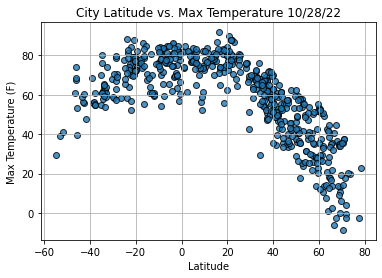

In [34]:
# Import time module

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

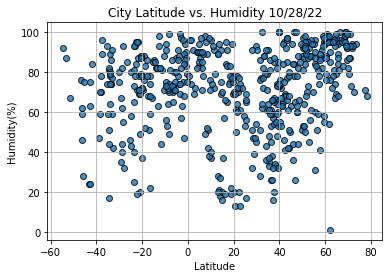

In [38]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

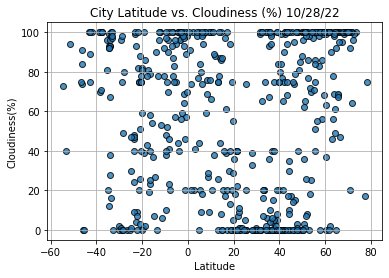

In [37]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()